In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
startups = pd.read_excel('startup-expansion.xlsx')

In [3]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
startups.shape

(150, 7)

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.9+ KB


In [6]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


# Preprocessing data 

In [7]:
startups['City'].nunique()

149

In [8]:
startups['City'].value_counts()

Rochester        2
Garden Grove     1
Tacoma           1
Thousand Oaks    1
Santa Clarita    1
                ..
Peoria           1
Inglewood        1
Aurora           1
South Bend       1
Ontario          1
Name: City, Length: 149, dtype: int64

In [9]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [10]:
startups['State'].nunique()

35

In [11]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [12]:
startups['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Illinois           5
Colorado           5
Georgia            4
New Jersey         4
Connecticut        4
Alabama            4
South Carolina     3
Kansas             3
Utah               3
Tennessee          3
Arizona            3
Massachusetts      3
Michigan           3
Iowa               3
New York           3
Louisiana          2
Oregon             2
North Carolina     2
Virginia           2
Ohio               2
New Hampshire      1
Mississippi        1
South Dakota       1
Indiana            1
Minnesota          1
Oklahoma           1
New Mexico         1
Montana            1
Arkansas           1
Rhode Island       1
Wisconsin          1
Name: State, dtype: int64

In [13]:
startups['Sales Region'].nunique()

2

In [14]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [15]:
startups['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [16]:
startups['New Expansion'].nunique()

2

In [17]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [18]:
startups['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [19]:
#find missing values 
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [20]:
#find duplicates values
startups.duplicated().sum()

0

## Exploring & Analysing Data


In [21]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
51,52,Fullerton,California,Region 2,Old,3246,44223
30,31,Boulder,Colorado,Region 2,Old,3083,22680
5,6,Yonkers,New York,Region 1,Old,3080,53827
3,4,Denton,Texas,Region 2,Old,2759,38284
34,35,Huntsville,Alabama,Region 1,Old,3335,59283
22,23,Montgomery,Alabama,Region 1,Old,3287,52114
120,121,Sterling Heights,Michigan,Region 1,Old,2357,35022
32,33,Tyler,Texas,Region 2,Old,2984,21718
44,45,San Bernardino,California,Region 2,Old,3399,59870
1,2,Midland,Texas,Region 2,Old,2727,45689


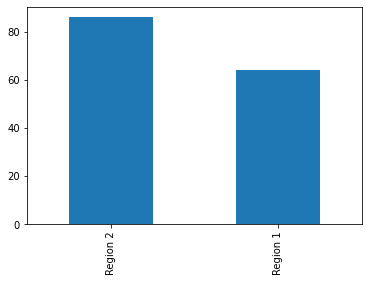

In [22]:
startups['Sales Region'].value_counts().plot.bar();

In [23]:
startups.groupby('New Expansion')

In [30]:
startups[startups['New Expansion'] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [40]:
startups[startups['New Expansion'] == 'New'].groupby(['State','City']).sum()['Revenue']

State       City            
Arizona     Tempe               48954
California  Glendale            49376
            Rancho Cucamonga    52366
            Thousand Oaks       40141
Illinois    Joliet              48315
            Rockford            43377
New Jersey  Paterson            34603
Tennessee   Chattanooga         55357
Texas       Brownsville         63148
            College Station     22457
Name: Revenue, dtype: int64

In [38]:
startups['Profit'] = startups['Revenue'] - startups['Marketing Spend']

In [39]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [41]:
startups['ROMs'] = round(startups['Profit']/startups['Marketing Spend']*100 ,2 )

In [42]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMs
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [44]:
startups['ROMs%'] = startups['ROMs'] / 100

In [45]:
startups.to_csv('startup-expansion-modified.csv')

In [47]:
startups= pd.read_csv('startup-expansion-modified.csv')

In [48]:
startups

,Unnamed: 0,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMs,ROMs%
0,0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...,...
145,145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007
